
Found 220 images belonging to 3 classes.
Found 220 images belonging to 3 classes.



2024-08-01 12:40:50,618 - WARNING - From C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py:1398: The name tf.executing_eagerly_outside_functions is deprecated. Please use tf.compat.v1.executing_eagerly_outside_functions instead.



2024-08-01 12:40:50,987 - WARNING - From C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\normalization\batch_normalization.py:979: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Epoch 1/100



2024-08-01 12:40:56,766 - WARNING - From C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\tf_utils.py:492: The name tf.ragged.RaggedTensorValue is deprecated. Please use tf.compat.v1.ragged.RaggedTensorValue instead.



2024-08-01 12:41:04,637 - WARNING - From C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\base_layer_utils.py:384: The name tf.executing_eagerly_outside_functions is deprecated. Please use tf.compat.v1.executing_eagerly_outside_functions instead.



7/7 [==============================] - 71s 6s/step - loss: 7.6374 - accuracy: 0.4182 - val_loss: 6.9424 - val_accuracy: 0.5455 - lr: 1.0000e-04
Epoch 2/100
7/7 [==============================] - 39s 6s/step - loss: 7.3632 - accuracy: 0.4955 - val_loss: 6.8732 - val_accuracy: 0.6636 - lr: 1.0000e-04
Epoch 3/100
7/7 [==============================] - 40s 6s/step - loss: 7.0475 - accuracy: 0.5591 - val_loss: 6.8084 - val_accuracy: 0.7591 - lr: 1.0000e-04
Epoch 4/100
7/7 [==============================] - 41s 6s/step - loss: 6.8436 - accuracy: 0.6773 - val_loss: 6.7468 - val_accuracy: 0.8273 - lr: 1.0000e-04
Epoch 5/100
7/7 [==============================] - 40s 6s/step - loss: 6.5451 - accuracy: 0.7500 - val_loss: 6.6853 - val_accuracy: 0.8864 - lr: 1.0000e-04
Epoch 6/100
7/7 [==============================] - 40s 6s/step - loss: 6.5032 - accuracy: 0.7682 - val_loss: 6.6238 - val_accuracy: 0.8909 - lr: 1.0000e-04
Epoch 7/100
7/7 [==============================] - 40s 6s/step - loss: 6.375

7/7 [==============================] - 58s 8s/step - loss: 5.2718 - accuracy: 0.9818 - val_loss: 5.1910 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 54/100
7/7 [==============================] - 48s 7s/step - loss: 5.1963 - accuracy: 0.9955 - val_loss: 5.1700 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 55/100
7/7 [==============================] - 48s 7s/step - loss: 5.1842 - accuracy: 0.9909 - val_loss: 5.1492 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 56/100
7/7 [==============================] - 41s 6s/step - loss: 5.1833 - accuracy: 0.9864 - val_loss: 5.1285 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 57/100
7/7 [==============================] - 45s 7s/step - loss: 5.1939 - accuracy: 0.9727 - val_loss: 5.1079 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 58/100
7/7 [==============================] - 40s 6s/step - loss: 5.1174 - accuracy: 1.0000 - val_loss: 5.0873 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 59/100
7/7 [==============================] - 44s 7s/step - loss:

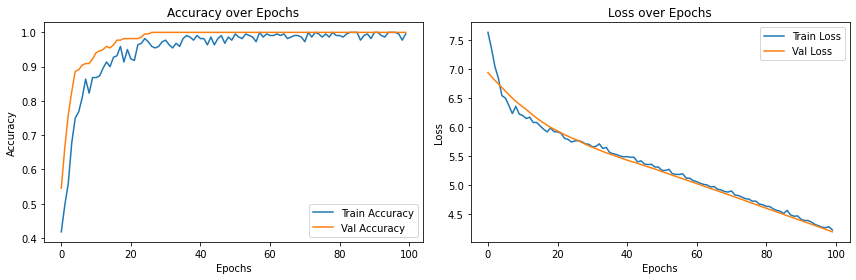

C:\Users\HP\AppData\Local\Temp\ipykernel_8044\3002012827.py:170: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


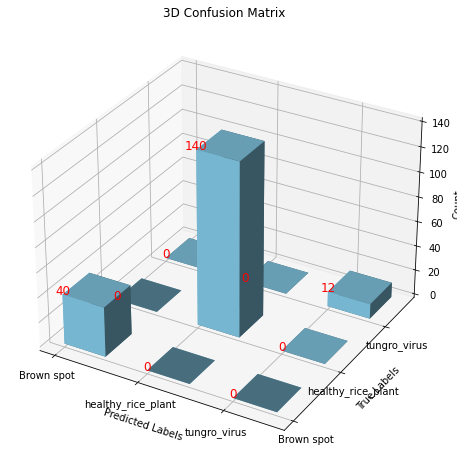

Classification Report:
                    precision    recall  f1-score   support

        Brown spot       1.00      1.00      1.00        40
healthy_rice_plant       1.00      1.00      1.00       140
      tungro_virus       1.00      1.00      1.00        12

          accuracy                           1.00       192
         macro avg       1.00      1.00      1.00       192
      weighted avg       1.00      1.00      1.00       192

Accuracy: 1.0000


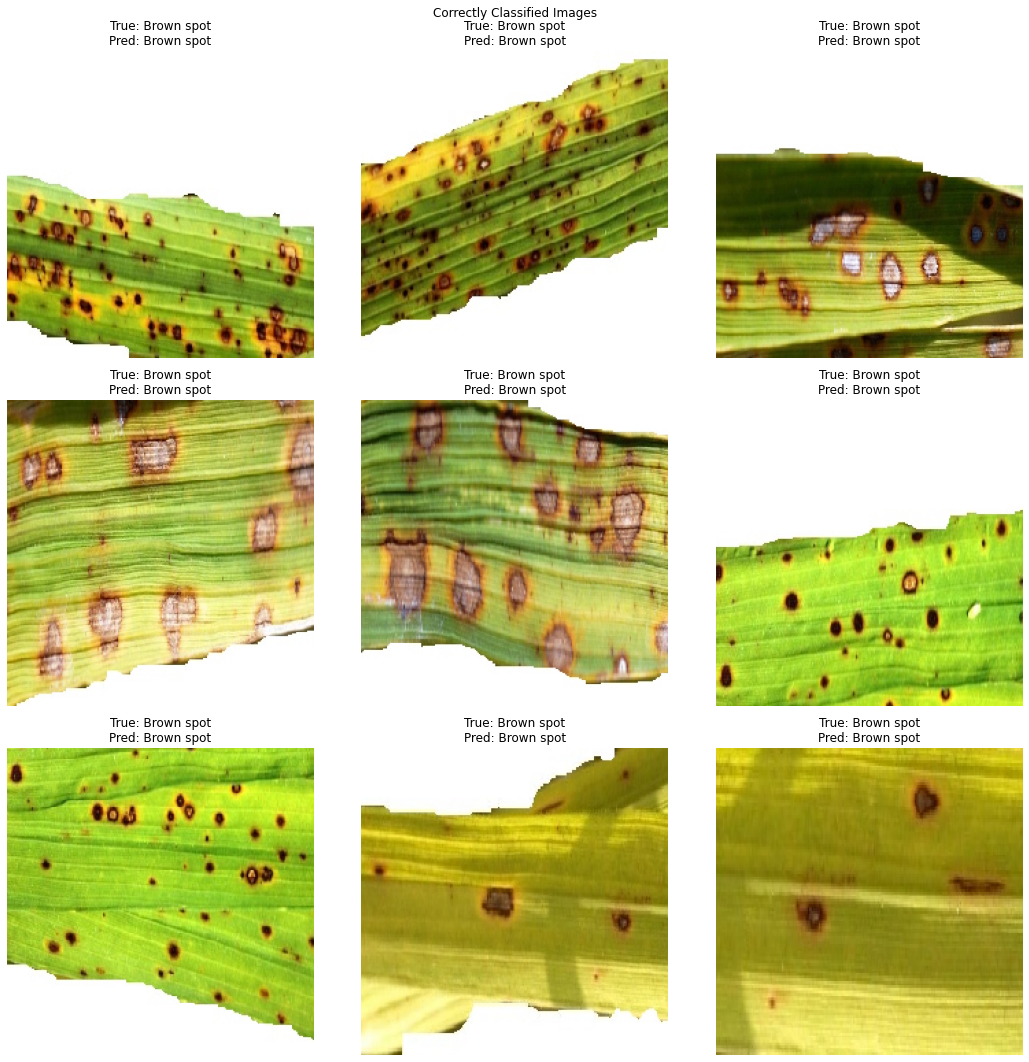

2024-08-01 13:53:03,388 - WARNING - Only 0 images available, plotting fewer images.


<Figure size 1080x1080 with 0 Axes>

6/6 [==============================] - 8s 960ms/step


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


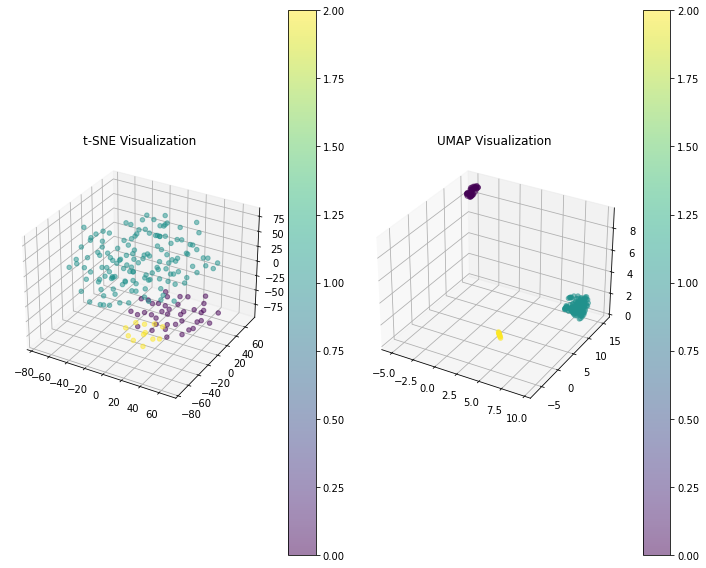

6/6 [==============================] - 10s 1s/step


2024-08-01 13:53:37,700 - INFO - Silhouette Score: 0.2135


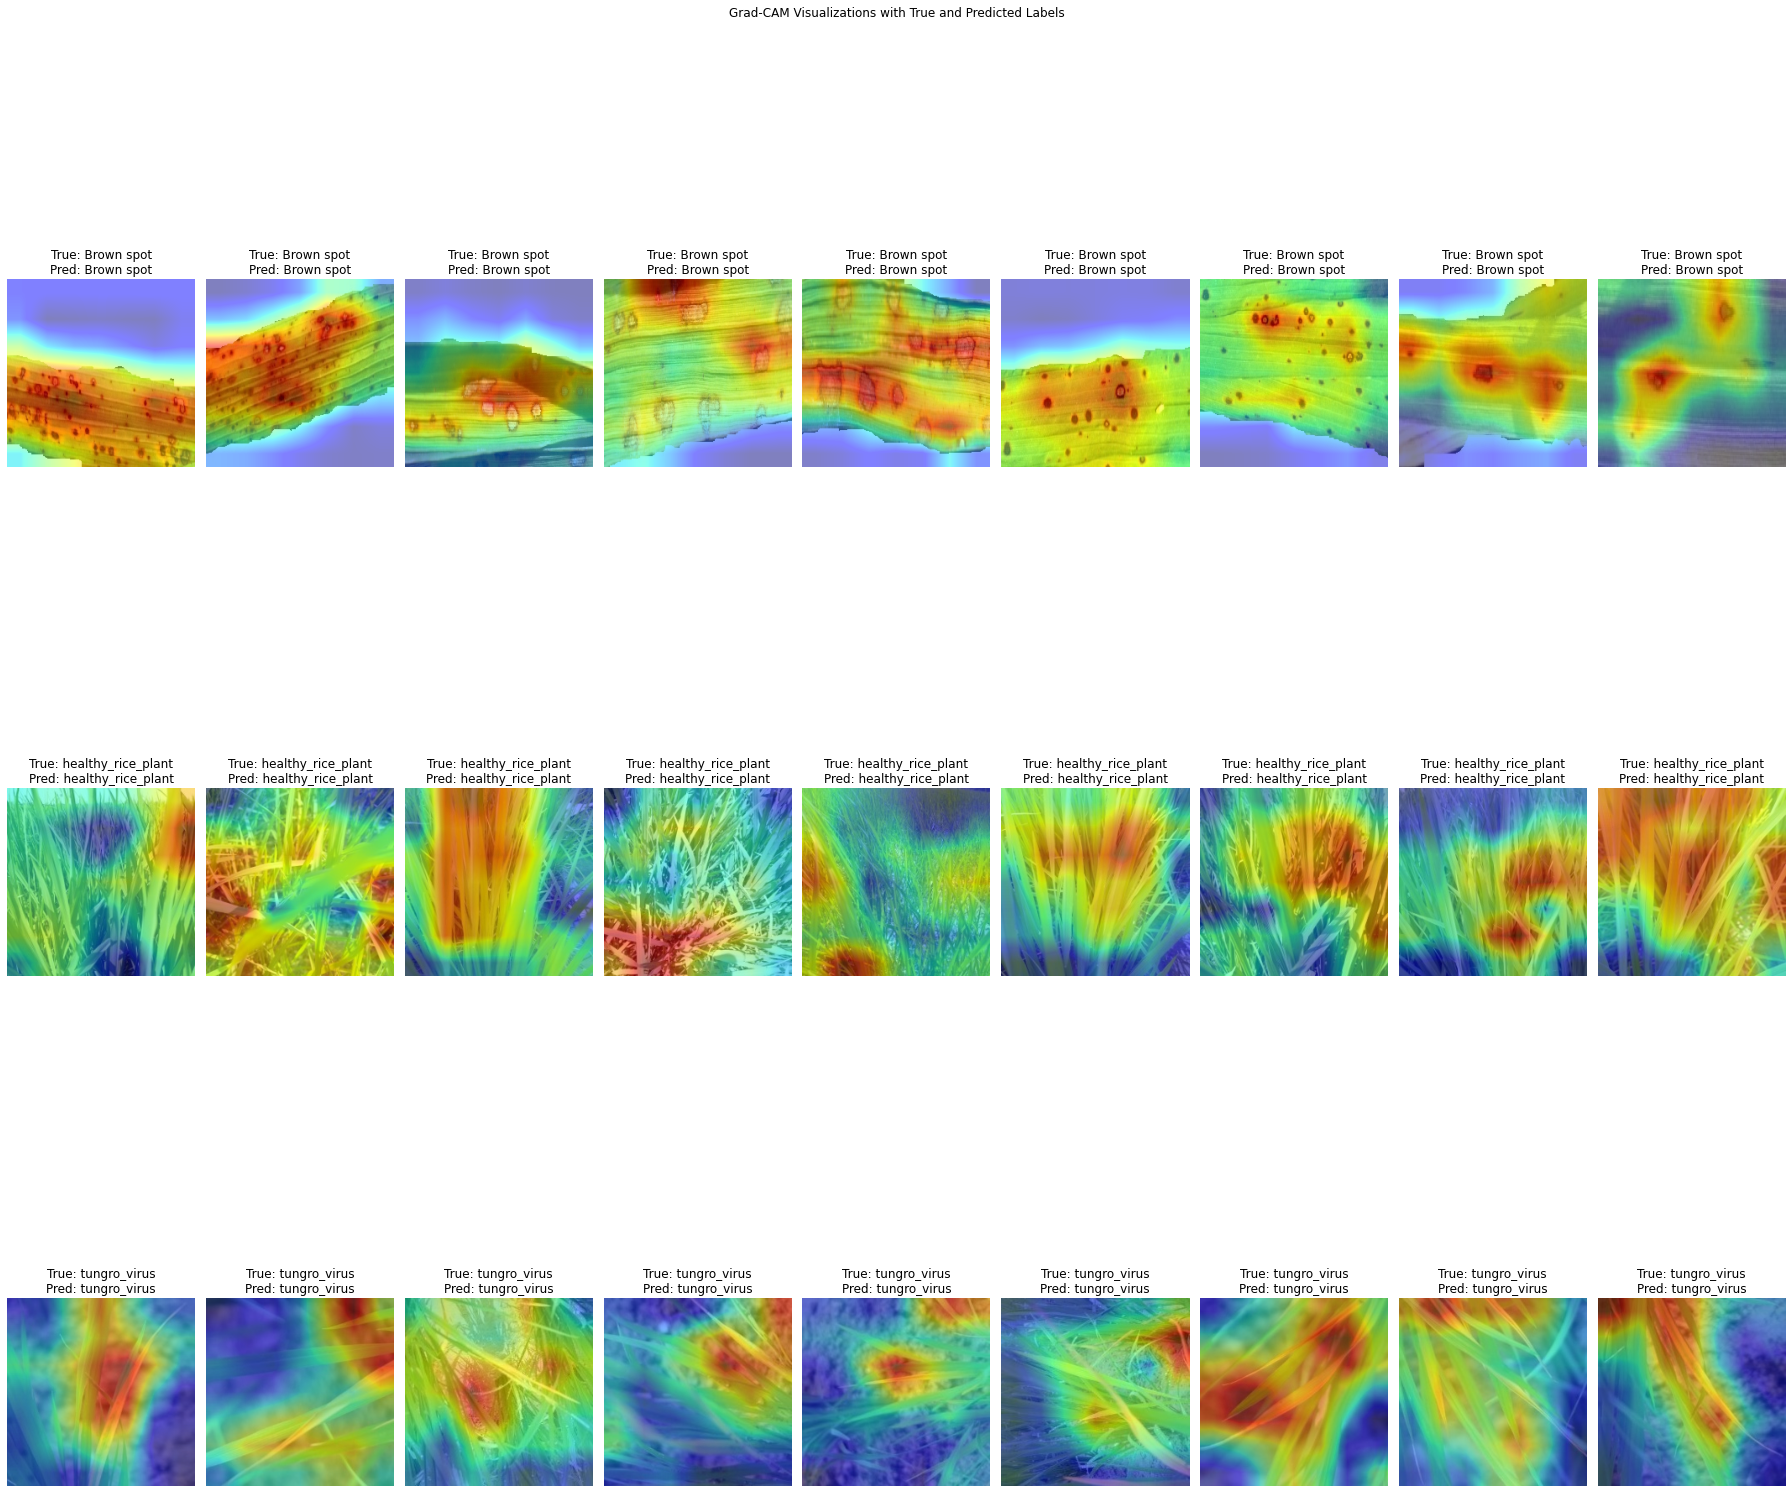

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0, DenseNet121, ResNet50
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import logging
from mpl_toolkits.mplot3d import Axes3D

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def verify_directory(directory):
    """Verify if the directory exists and is not empty."""
    if not os.path.isdir(directory):
        raise ValueError(f"Directory '{directory}' does not exist.")
    if not os.listdir(directory):
        raise ValueError(f"Directory '{directory}' is empty.")

def create_generators(train_dir, val_dir, preprocessing_function):
    """Create data generators for training and validation datasets."""
    train_datagen = ImageDataGenerator(
        preprocessing_function=preprocessing_function,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.8, 1.2],
        fill_mode='nearest'
    )

    val_datagen = ImageDataGenerator(preprocessing_function=preprocessing_function)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical'
    )

    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    return train_generator, val_generator

def create_model(input_shape, num_classes, architecture):
    """Create a CNN model with a specified architecture."""
    if architecture == 'EfficientNetB0':
        base_model = EfficientNetB0(include_top=False, input_shape=input_shape, weights='imagenet')
        last_conv_layer_name = 'top_conv'
    elif architecture == 'DenseNet121':
        base_model = DenseNet121(include_top=False, input_shape=input_shape, weights='imagenet')
        last_conv_layer_name = 'conv5_block16_2_conv'
    else:  # Default to ResNet50
        base_model = ResNet50(include_top=False, input_shape=input_shape, weights='imagenet')
        last_conv_layer_name = 'conv5_block3_out'

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model, last_conv_layer_name

def train_and_evaluate_model(model, train_generator, val_generator, epochs=100):
    """Train and evaluate the model."""
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=val_generator,
        callbacks=[early_stopping, reduce_lr]
    )

    val_steps = val_generator.samples // val_generator.batch_size
    val_images = []
    val_labels = []
    for i in range(val_steps):
        images, labels = val_generator.next()
        val_images.append(images)
        val_labels.append(labels)

    val_images = np.concatenate(val_images)
    val_labels = np.concatenate(val_labels)
    predicted_labels = np.argmax(model.predict(val_images), axis=-1)

    return history, val_images, val_labels, predicted_labels

def plot_metrics(history):
    """Plot training metrics."""
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy over Epochs')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over Epochs')

    plt.tight_layout()
    plt.show()

def plot_3d_confusion_matrix(true_labels, predicted_labels, class_names):
    """Plot 3D confusion matrix."""
    cm = confusion_matrix(true_labels, predicted_labels)
    num_classes = len(class_names)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    x_data, y_data = np.meshgrid(np.arange(num_classes), np.arange(num_classes))
    x_data = x_data.flatten()
    y_data = y_data.flatten()
    z_data = np.zeros_like(x_data)

    dx = dy = 0.5
    dz = cm.flatten()

    for i in range(len(dz)):
        ax.text(x_data[i], y_data[i], dz[i], str(dz[i]), color='red', fontsize=12, ha='center')

    ax.bar3d(x_data, y_data, z_data, dx, dy, dz, color='skyblue', zsort='average')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_zlabel('Count')
    ax.set_xticks(np.arange(num_classes))
    ax.set_yticks(np.arange(num_classes))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    ax.set_title('3D Confusion Matrix')

    plt.tight_layout()
    plt.show()

def display_classification_report(true_labels, predicted_labels, class_names):
    """Display classification report."""
    report = classification_report(true_labels, predicted_labels, target_names=class_names)
    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"Classification Report:\n{report}")
    print(f"Accuracy: {accuracy:.4f}")

def plot_selected_images(val_images, val_labels, predicted_labels, class_names, correct=True, num_images=9):
    """Plot selected correctly or incorrectly classified images."""
    indices = np.where(np.argmax(val_labels, axis=1) == predicted_labels if correct else np.argmax(val_labels, axis=1) != predicted_labels)[0]
    if len(indices) < num_images:
        logging.warning(f"Only {len(indices)} images available, plotting fewer images.")
        num_images = len(indices)
        
    plt.figure(figsize=(15, 15))
    for i, idx in enumerate(indices[:num_images]):
        plt.subplot(3, 3, i + 1)
        plt.imshow(val_images[idx].astype(np.uint8))
        plt.title(f"True: {class_names[np.argmax(val_labels[idx])]}\nPred: {class_names[predicted_labels[idx]]}")
        plt.axis('off')
    plt.suptitle('Correctly Classified Images' if correct else 'Misclassified Images')
    plt.tight_layout()
    plt.show()

def plot_tsne_umap(model, val_images, val_labels):
    """Plot t-SNE and UMAP visualizations in 3D."""
    intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-3].output)
    intermediate_output = intermediate_layer_model.predict(val_images)

    # t-SNE visualization
    tsne = TSNE(n_components=3, random_state=42)
    tsne_results = tsne.fit_transform(intermediate_output)

    fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(121, projection='3d')
    sc1 = ax1.scatter(tsne_results[:, 0], tsne_results[:, 1], tsne_results[:, 2], c=np.argmax(val_labels, axis=1), cmap='viridis', alpha=0.5)
    plt.colorbar(sc1)
    ax1.set_title('t-SNE Visualization')

    # UMAP visualization
    umap_results = umap.UMAP(n_components=3, random_state=42).fit_transform(intermediate_output)

    ax2 = fig.add_subplot(122, projection='3d')
    sc2 = ax2.scatter(umap_results[:, 0], umap_results[:, 1], umap_results[:, 2], c=np.argmax(val_labels, axis=1), cmap='viridis', alpha=0.5)
    plt.colorbar(sc2)
    ax2.set_title('UMAP Visualization')

    plt.tight_layout()
    plt.show()

def perform_cluster_analysis(model, val_images, val_labels, num_clusters):
    """Perform cluster analysis and display silhouette score."""
    intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-3].output)
    intermediate_output = intermediate_layer_model.predict(val_images)

    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(intermediate_output)
    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(intermediate_output, cluster_labels)
    logging.info(f'Silhouette Score: {silhouette_avg:.4f}')

def plot_grad_cam(model, val_images, val_labels, predicted_labels, class_names, layer_name, num_classes):
    """Plot Grad-CAM visualizations for each class."""
    def get_grad_cam_heatmap(img_array, model, last_conv_layer_name, pred_index):
        grad_model = tf.keras.models.Model(
            [model.inputs],
            [model.get_layer(last_conv_layer_name).output, model.output]
        )

        with tf.GradientTape() as tape:
            last_conv_layer_output, preds = grad_model(img_array)
            class_channel = preds[:, pred_index]

        grads = tape.gradient(class_channel, last_conv_layer_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
        last_conv_layer_output = last_conv_layer_output[0]
        heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
        heatmap = tf.squeeze(heatmap)
        heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
        return heatmap.numpy()

    fig, axs = plt.subplots(num_classes, 9, figsize=(25, 25))
    for class_index in range(num_classes):
        class_images_indices = np.where(np.argmax(val_labels, axis=1) == class_index)[0][:9]
        for i, idx in enumerate(class_images_indices):
            img_array = np.expand_dims(val_images[idx], axis=0)
            heatmap = get_grad_cam_heatmap(img_array, model, layer_name, class_index)
            if heatmap is not None:
                heatmap = np.uint8(255 * heatmap)
                heatmap = np.expand_dims(heatmap, axis=-1)
                heatmap = tf.image.resize(heatmap, (224, 224)).numpy()
                heatmap = np.squeeze(heatmap)

                true_label = np.argmax(val_labels[idx])
                predicted_label = predicted_labels[idx]

                axs[class_index, i].imshow(val_images[idx].astype(np.uint8))
                axs[class_index, i].imshow(heatmap, cmap='jet', alpha=0.5)
                axs[class_index, i].set_title(f"True: {class_names[true_label]}\nPred: {class_names[predicted_label]}")
                axs[class_index, i].axis('off')

    plt.suptitle('Grad-CAM Visualizations with True and Predicted Labels')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Define your parameters
    config = {
        'train_dir': 'C:/Users/HP/Desktop/Nana Kofi/train',  # Replace with your actual path
        'val_dir': 'C:/Users/HP/Desktop/Nana Kofi/validation',  # Replace with your actual path
        'num_classes': 3,  # Replace with the actual number of classes
        'architecture': 'EfficientNetB0',  # Choose from 'EfficientNetB0', 'DenseNet121', 'ResNet50'
        'epochs': 100,
    }

    # Verify directories
    try:
        verify_directory(config['train_dir'])
        verify_directory(config['val_dir'])
    except ValueError as e:
        logging.error(str(e))
        raise SystemExit(str(e))

    # Choose preprocessing function based on architecture
    preprocessing_functions = {
        'EfficientNetB0': tf.keras.applications.efficientnet.preprocess_input,
        'DenseNet121': tf.keras.applications.densenet.preprocess_input,
        'ResNet50': tf.keras.applications.resnet.preprocess_input
    }
    preprocessing_function = preprocessing_functions.get(config['architecture'], tf.keras.applications.efficientnet.preprocess_input)

    # Create data generators
    train_generator, val_generator = create_generators(config['train_dir'], config['val_dir'], preprocessing_function)

    # Create model
    input_shape = (224, 224, 3)
    model, last_conv_layer_name = create_model(input_shape, config['num_classes'], config['architecture'])

    # Train and evaluate model
    history, val_images, val_labels, predicted_labels = train_and_evaluate_model(model, train_generator, val_generator, epochs=config['epochs'])

    # Plot metrics
    plot_metrics(history)

    # Get class names
    class_names = list(train_generator.class_indices.keys())

    # Plot 3D confusion matrix
    plot_3d_confusion_matrix(np.argmax(val_labels, axis=1), predicted_labels, class_names)

    # Display classification report
    display_classification_report(np.argmax(val_labels, axis=1), predicted_labels, class_names)

    # Plot selected correctly and incorrectly classified images
    plot_selected_images(val_images, val_labels, predicted_labels, class_names, correct=True)
    plot_selected_images(val_images, val_labels, predicted_labels, class_names, correct=False)

    # Perform t-SNE and UMAP visualizations
    plot_tsne_umap(model, val_images, val_labels)

    # Perform cluster analysis
    perform_cluster_analysis(model, val_images, val_labels, num_clusters=5)

    # Plot Grad-CAM visualizations
    plot_grad_cam(model, val_images, val_labels, predicted_labels, class_names, last_conv_layer_name, config['num_classes'])
